## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  25.366320  1324.094663  0.802607  8.553250  1.732809
1  43.648924  1736.745257  0.491979  4.796834  1.369708
2  15.568623  1503.402809  0.795712  6.813678  1.547377
3  66.107435   469.931798  0.601673  5.556450  1.368779
4  21.724152   704.457682  0.271708  6.653917  1.465895


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.001),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 1.26175 | train_mse: 5.3579  | train_mae: 1.69744 |  0:00:00s
epoch 1  | loss: 1.205   | train_mse: 3.75107 | train_mae: 1.47299 |  0:00:00s
epoch 2  | loss: 0.99748 | train_mse: 3.22609 | train_mae: 1.39793 |  0:00:00s


epoch 3  | loss: 1.23465 | train_mse: 2.88119 | train_mae: 1.31533 |  0:00:00s
epoch 4  | loss: 0.96467 | train_mse: 2.39524 | train_mae: 1.18605 |  0:00:00s


epoch 5  | loss: 0.86873 | train_mse: 1.97056 | train_mae: 1.06852 |  0:00:00s
epoch 6  | loss: 0.88824 | train_mse: 1.75649 | train_mae: 1.00155 |  0:00:00s
epoch 7  | loss: 0.93502 | train_mse: 1.58332 | train_mae: 0.96503 |  0:00:00s


epoch 8  | loss: 0.76875 | train_mse: 1.42481 | train_mae: 0.92008 |  0:00:01s
epoch 9  | loss: 0.85961 | train_mse: 1.37706 | train_mae: 0.90841 |  0:00:01s
epoch 10 | loss: 0.87756 | train_mse: 1.16335 | train_mae: 0.8381  |  0:00:01s


epoch 11 | loss: 0.77623 | train_mse: 1.03799 | train_mae: 0.79427 |  0:00:01s
epoch 12 | loss: 0.73744 | train_mse: 0.9501  | train_mae: 0.75254 |  0:00:01s
epoch 13 | loss: 0.65556 | train_mse: 0.88186 | train_mae: 0.7312  |  0:00:01s


epoch 14 | loss: 0.60537 | train_mse: 0.81253 | train_mae: 0.69714 |  0:00:01s
epoch 15 | loss: 0.7202  | train_mse: 0.75692 | train_mae: 0.6659  |  0:00:01s
epoch 16 | loss: 0.64866 | train_mse: 0.70388 | train_mae: 0.64469 |  0:00:01s


epoch 17 | loss: 0.74213 | train_mse: 0.65235 | train_mae: 0.61725 |  0:00:01s
epoch 18 | loss: 0.67089 | train_mse: 0.62311 | train_mae: 0.60141 |  0:00:01s
epoch 19 | loss: 0.61194 | train_mse: 0.58474 | train_mae: 0.57525 |  0:00:02s


epoch 20 | loss: 0.57457 | train_mse: 0.56094 | train_mae: 0.56178 |  0:00:02s
epoch 21 | loss: 0.45477 | train_mse: 0.54974 | train_mae: 0.5524  |  0:00:02s
epoch 22 | loss: 0.44571 | train_mse: 0.52358 | train_mae: 0.5359  |  0:00:02s


epoch 23 | loss: 0.57861 | train_mse: 0.50543 | train_mae: 0.52727 |  0:00:02s
epoch 24 | loss: 0.42336 | train_mse: 0.49279 | train_mae: 0.52289 |  0:00:02s
epoch 25 | loss: 0.37117 | train_mse: 0.4888  | train_mae: 0.52315 |  0:00:02s


epoch 26 | loss: 0.50533 | train_mse: 0.47896 | train_mae: 0.52359 |  0:00:02s
epoch 27 | loss: 0.41176 | train_mse: 0.46315 | train_mae: 0.52078 |  0:00:02s


epoch 28 | loss: 0.46204 | train_mse: 0.44964 | train_mae: 0.51588 |  0:00:02s
epoch 29 | loss: 0.47159 | train_mse: 0.42949 | train_mae: 0.5078  |  0:00:02s
epoch 30 | loss: 0.50143 | train_mse: 0.42812 | train_mae: 0.5062  |  0:00:03s


epoch 31 | loss: 0.45425 | train_mse: 0.41858 | train_mae: 0.50068 |  0:00:03s
epoch 32 | loss: 0.39013 | train_mse: 0.40884 | train_mae: 0.49808 |  0:00:03s
epoch 33 | loss: 0.36848 | train_mse: 0.39478 | train_mae: 0.49443 |  0:00:03s


epoch 34 | loss: 0.66542 | train_mse: 0.38621 | train_mae: 0.49238 |  0:00:03s
epoch 35 | loss: 0.46713 | train_mse: 0.37847 | train_mae: 0.48867 |  0:00:03s
epoch 36 | loss: 0.42493 | train_mse: 0.36417 | train_mae: 0.48074 |  0:00:03s


epoch 37 | loss: 0.38336 | train_mse: 0.35083 | train_mae: 0.47357 |  0:00:03s
epoch 38 | loss: 0.37856 | train_mse: 0.34069 | train_mae: 0.46594 |  0:00:03s


epoch 39 | loss: 0.64542 | train_mse: 0.33444 | train_mae: 0.46086 |  0:00:03s
epoch 40 | loss: 0.53886 | train_mse: 0.33003 | train_mae: 0.45715 |  0:00:03s
epoch 41 | loss: 0.48423 | train_mse: 0.33051 | train_mae: 0.45753 |  0:00:04s
epoch 42 | loss: 0.41015 | train_mse: 0.32187 | train_mae: 0.45199 |  0:00:04s


epoch 43 | loss: 0.30999 | train_mse: 0.31964 | train_mae: 0.45004 |  0:00:04s
epoch 44 | loss: 0.37205 | train_mse: 0.31794 | train_mae: 0.44684 |  0:00:04s
epoch 45 | loss: 0.36626 | train_mse: 0.30773 | train_mae: 0.43643 |  0:00:04s


epoch 46 | loss: 0.46899 | train_mse: 0.30216 | train_mae: 0.43433 |  0:00:04s
epoch 47 | loss: 0.43678 | train_mse: 0.29047 | train_mae: 0.42885 |  0:00:04s
epoch 48 | loss: 0.37863 | train_mse: 0.27966 | train_mae: 0.42251 |  0:00:04s


epoch 49 | loss: 0.30412 | train_mse: 0.28296 | train_mae: 0.42396 |  0:00:04s
epoch 50 | loss: 0.32843 | train_mse: 0.27781 | train_mae: 0.4196  |  0:00:04s


epoch 51 | loss: 0.44616 | train_mse: 0.26758 | train_mae: 0.41294 |  0:00:05s
epoch 52 | loss: 0.34851 | train_mse: 0.26306 | train_mae: 0.40851 |  0:00:05s


epoch 53 | loss: 0.34286 | train_mse: 0.25428 | train_mae: 0.40163 |  0:00:05s
epoch 54 | loss: 0.34059 | train_mse: 0.2486  | train_mae: 0.39935 |  0:00:05s


epoch 55 | loss: 0.5365  | train_mse: 0.24216 | train_mae: 0.39626 |  0:00:05s
epoch 56 | loss: 0.48947 | train_mse: 0.23407 | train_mae: 0.39091 |  0:00:05s


epoch 57 | loss: 0.485   | train_mse: 0.22606 | train_mae: 0.38413 |  0:00:05s
epoch 58 | loss: 0.33796 | train_mse: 0.22204 | train_mae: 0.38165 |  0:00:05s


epoch 59 | loss: 0.44933 | train_mse: 0.22202 | train_mae: 0.38339 |  0:00:06s
epoch 60 | loss: 0.31474 | train_mse: 0.22105 | train_mae: 0.38329 |  0:00:06s


epoch 61 | loss: 0.32481 | train_mse: 0.22101 | train_mae: 0.38198 |  0:00:06s
epoch 62 | loss: 0.29105 | train_mse: 0.21732 | train_mae: 0.37935 |  0:00:06s


epoch 63 | loss: 0.36267 | train_mse: 0.22024 | train_mae: 0.38044 |  0:00:06s
epoch 64 | loss: 0.25226 | train_mse: 0.21704 | train_mae: 0.37614 |  0:00:06s


epoch 65 | loss: 0.37153 | train_mse: 0.21434 | train_mae: 0.37214 |  0:00:06s
epoch 66 | loss: 0.30728 | train_mse: 0.20763 | train_mae: 0.36791 |  0:00:07s


epoch 67 | loss: 0.24561 | train_mse: 0.20597 | train_mae: 0.36396 |  0:00:07s
epoch 68 | loss: 0.22677 | train_mse: 0.20193 | train_mae: 0.35826 |  0:00:07s


epoch 69 | loss: 0.25333 | train_mse: 0.18939 | train_mae: 0.34863 |  0:00:07s
epoch 70 | loss: 0.34212 | train_mse: 0.17964 | train_mae: 0.34042 |  0:00:07s


epoch 71 | loss: 0.37319 | train_mse: 0.17674 | train_mae: 0.33446 |  0:00:07s


epoch 72 | loss: 0.3207  | train_mse: 0.17506 | train_mae: 0.33757 |  0:00:07s
epoch 73 | loss: 0.29274 | train_mse: 0.17808 | train_mae: 0.34369 |  0:00:08s


epoch 74 | loss: 0.37167 | train_mse: 0.18142 | train_mae: 0.34897 |  0:00:08s
epoch 75 | loss: 0.27018 | train_mse: 0.18768 | train_mae: 0.35445 |  0:00:08s
epoch 76 | loss: 0.44156 | train_mse: 0.19399 | train_mae: 0.35798 |  0:00:08s


epoch 77 | loss: 0.26404 | train_mse: 0.19142 | train_mae: 0.35614 |  0:00:08s
epoch 78 | loss: 0.27804 | train_mse: 0.19458 | train_mae: 0.36288 |  0:00:08s
epoch 79 | loss: 0.3362  | train_mse: 0.19454 | train_mae: 0.3651  |  0:00:08s


epoch 80 | loss: 0.25177 | train_mse: 0.19075 | train_mae: 0.36122 |  0:00:08s
epoch 81 | loss: 0.43869 | train_mse: 0.18983 | train_mae: 0.35739 |  0:00:08s
epoch 82 | loss: 0.41858 | train_mse: 0.18831 | train_mae: 0.3514  |  0:00:08s


epoch 83 | loss: 0.3283  | train_mse: 0.19323 | train_mae: 0.34912 |  0:00:08s
epoch 84 | loss: 0.31311 | train_mse: 0.18767 | train_mae: 0.34666 |  0:00:09s
epoch 85 | loss: 0.32001 | train_mse: 0.18663 | train_mae: 0.34822 |  0:00:09s


epoch 86 | loss: 0.38661 | train_mse: 0.18482 | train_mae: 0.3438  |  0:00:09s
epoch 87 | loss: 0.26336 | train_mse: 0.18262 | train_mae: 0.33974 |  0:00:09s
epoch 88 | loss: 0.42939 | train_mse: 0.17664 | train_mae: 0.3361  |  0:00:09s


epoch 89 | loss: 0.27421 | train_mse: 0.17159 | train_mae: 0.33127 |  0:00:09s
epoch 90 | loss: 0.48629 | train_mse: 0.17199 | train_mae: 0.33276 |  0:00:09s
epoch 91 | loss: 0.30975 | train_mse: 0.17113 | train_mae: 0.33203 |  0:00:09s


epoch 92 | loss: 0.23161 | train_mse: 0.16996 | train_mae: 0.33064 |  0:00:09s
epoch 93 | loss: 0.30947 | train_mse: 0.16536 | train_mae: 0.32948 |  0:00:09s
epoch 94 | loss: 0.27763 | train_mse: 0.16323 | train_mae: 0.32899 |  0:00:09s


epoch 95 | loss: 0.35183 | train_mse: 0.16174 | train_mae: 0.33016 |  0:00:10s
epoch 96 | loss: 0.30739 | train_mse: 0.16283 | train_mae: 0.32943 |  0:00:10s
epoch 97 | loss: 0.28862 | train_mse: 0.15908 | train_mae: 0.32596 |  0:00:10s


epoch 98 | loss: 0.22714 | train_mse: 0.15805 | train_mae: 0.32738 |  0:00:10s
epoch 99 | loss: 0.33716 | train_mse: 0.15943 | train_mae: 0.32892 |  0:00:10s
epoch 100| loss: 0.31445 | train_mse: 0.1607  | train_mae: 0.33092 |  0:00:10s


epoch 101| loss: 0.30833 | train_mse: 0.16298 | train_mae: 0.33524 |  0:00:10s
epoch 102| loss: 0.36572 | train_mse: 0.16466 | train_mae: 0.33394 |  0:00:10s
epoch 103| loss: 0.444   | train_mse: 0.16394 | train_mae: 0.33494 |  0:00:10s


epoch 104| loss: 0.23209 | train_mse: 0.16283 | train_mae: 0.33454 |  0:00:10s
epoch 105| loss: 0.24911 | train_mse: 0.16011 | train_mae: 0.33084 |  0:00:10s
epoch 106| loss: 0.21759 | train_mse: 0.15772 | train_mae: 0.32952 |  0:00:11s


epoch 107| loss: 0.24045 | train_mse: 0.15688 | train_mae: 0.32922 |  0:00:11s
epoch 108| loss: 0.2177  | train_mse: 0.15703 | train_mae: 0.3326  |  0:00:11s
epoch 109| loss: 0.26738 | train_mse: 0.15597 | train_mae: 0.33524 |  0:00:11s


epoch 110| loss: 0.29521 | train_mse: 0.15296 | train_mae: 0.33366 |  0:00:11s
epoch 111| loss: 0.21991 | train_mse: 0.15033 | train_mae: 0.33112 |  0:00:11s
epoch 112| loss: 0.22497 | train_mse: 0.15045 | train_mae: 0.33001 |  0:00:11s


epoch 113| loss: 0.2892  | train_mse: 0.15251 | train_mae: 0.32804 |  0:00:11s
epoch 114| loss: 0.24597 | train_mse: 0.14975 | train_mae: 0.3224  |  0:00:11s
epoch 115| loss: 0.24735 | train_mse: 0.14984 | train_mae: 0.32117 |  0:00:11s


epoch 116| loss: 0.22513 | train_mse: 0.14695 | train_mae: 0.31974 |  0:00:12s
epoch 117| loss: 0.23187 | train_mse: 0.14436 | train_mae: 0.31849 |  0:00:12s
epoch 118| loss: 0.30891 | train_mse: 0.14437 | train_mae: 0.31633 |  0:00:12s


epoch 119| loss: 0.32575 | train_mse: 0.14339 | train_mae: 0.31542 |  0:00:12s
epoch 120| loss: 0.397   | train_mse: 0.1431  | train_mae: 0.31408 |  0:00:12s
epoch 121| loss: 0.30414 | train_mse: 0.14385 | train_mae: 0.31519 |  0:00:12s


epoch 122| loss: 0.25144 | train_mse: 0.14355 | train_mae: 0.31538 |  0:00:12s
epoch 123| loss: 0.2371  | train_mse: 0.14117 | train_mae: 0.31112 |  0:00:12s
epoch 124| loss: 0.16079 | train_mse: 0.13934 | train_mae: 0.30819 |  0:00:12s


epoch 125| loss: 0.25217 | train_mse: 0.13892 | train_mae: 0.30935 |  0:00:12s
epoch 126| loss: 0.29481 | train_mse: 0.13615 | train_mae: 0.30862 |  0:00:12s
epoch 127| loss: 0.18573 | train_mse: 0.1351  | train_mae: 0.30864 |  0:00:12s


epoch 128| loss: 0.29022 | train_mse: 0.13589 | train_mae: 0.30907 |  0:00:13s
epoch 129| loss: 0.2266  | train_mse: 0.13426 | train_mae: 0.30791 |  0:00:13s
epoch 130| loss: 0.25401 | train_mse: 0.13224 | train_mae: 0.3038  |  0:00:13s


epoch 131| loss: 0.21535 | train_mse: 0.12879 | train_mae: 0.29847 |  0:00:13s
epoch 132| loss: 0.18268 | train_mse: 0.12531 | train_mae: 0.29272 |  0:00:13s
epoch 133| loss: 0.34787 | train_mse: 0.12145 | train_mae: 0.28669 |  0:00:13s


epoch 134| loss: 0.21475 | train_mse: 0.12215 | train_mae: 0.2886  |  0:00:13s
epoch 135| loss: 0.35048 | train_mse: 0.12378 | train_mae: 0.28886 |  0:00:13s
epoch 136| loss: 0.465   | train_mse: 0.1249  | train_mae: 0.29052 |  0:00:13s


epoch 137| loss: 0.28006 | train_mse: 0.12449 | train_mae: 0.28879 |  0:00:13s
epoch 138| loss: 0.19679 | train_mse: 0.12562 | train_mae: 0.29019 |  0:00:13s
epoch 139| loss: 0.20876 | train_mse: 0.12578 | train_mae: 0.29036 |  0:00:14s


epoch 140| loss: 0.25122 | train_mse: 0.12687 | train_mae: 0.29068 |  0:00:14s
epoch 141| loss: 0.31034 | train_mse: 0.12721 | train_mae: 0.29158 |  0:00:14s
epoch 142| loss: 0.27758 | train_mse: 0.1243  | train_mae: 0.28799 |  0:00:14s


epoch 143| loss: 0.29453 | train_mse: 0.12161 | train_mae: 0.28363 |  0:00:14s
epoch 144| loss: 0.24374 | train_mse: 0.12117 | train_mae: 0.28311 |  0:00:14s
epoch 145| loss: 0.25038 | train_mse: 0.12496 | train_mae: 0.28815 |  0:00:14s


epoch 146| loss: 0.23535 | train_mse: 0.12696 | train_mae: 0.29313 |  0:00:14s
epoch 147| loss: 0.26945 | train_mse: 0.12978 | train_mae: 0.29678 |  0:00:14s
epoch 148| loss: 0.27549 | train_mse: 0.13187 | train_mae: 0.29643 |  0:00:14s


epoch 149| loss: 0.26772 | train_mse: 0.13373 | train_mae: 0.29958 |  0:00:14s
epoch 150| loss: 0.26608 | train_mse: 0.13507 | train_mae: 0.30031 |  0:00:14s


epoch 151| loss: 0.25941 | train_mse: 0.13665 | train_mae: 0.30083 |  0:00:15s
epoch 152| loss: 0.24701 | train_mse: 0.13646 | train_mae: 0.29982 |  0:00:15s
epoch 153| loss: 0.18985 | train_mse: 0.13666 | train_mae: 0.30049 |  0:00:15s


epoch 154| loss: 0.34979 | train_mse: 0.1363  | train_mae: 0.30094 |  0:00:15s
epoch 155| loss: 0.32909 | train_mse: 0.13327 | train_mae: 0.29718 |  0:00:15s
epoch 156| loss: 0.1975  | train_mse: 0.12861 | train_mae: 0.29225 |  0:00:15s


epoch 157| loss: 0.22908 | train_mse: 0.12247 | train_mae: 0.28663 |  0:00:15s
epoch 158| loss: 0.23293 | train_mse: 0.1144  | train_mae: 0.2764  |  0:00:15s
epoch 159| loss: 0.26662 | train_mse: 0.11145 | train_mae: 0.27341 |  0:00:15s


epoch 160| loss: 0.34424 | train_mse: 0.11388 | train_mae: 0.28065 |  0:00:15s
epoch 161| loss: 0.22344 | train_mse: 0.12049 | train_mae: 0.28967 |  0:00:15s
epoch 162| loss: 0.19337 | train_mse: 0.12569 | train_mae: 0.29464 |  0:00:16s


epoch 163| loss: 0.31987 | train_mse: 0.12935 | train_mae: 0.29731 |  0:00:16s
epoch 164| loss: 0.16257 | train_mse: 0.12985 | train_mae: 0.29772 |  0:00:16s
epoch 165| loss: 0.21082 | train_mse: 0.12857 | train_mae: 0.29741 |  0:00:16s


epoch 166| loss: 0.27329 | train_mse: 0.12433 | train_mae: 0.29248 |  0:00:16s
epoch 167| loss: 0.32767 | train_mse: 0.12439 | train_mae: 0.29656 |  0:00:16s
epoch 168| loss: 0.21082 | train_mse: 0.12151 | train_mae: 0.29439 |  0:00:16s


epoch 169| loss: 0.23818 | train_mse: 0.12228 | train_mae: 0.29774 |  0:00:16s
epoch 170| loss: 0.20843 | train_mse: 0.11983 | train_mae: 0.29668 |  0:00:16s
epoch 171| loss: 0.17618 | train_mse: 0.11619 | train_mae: 0.29333 |  0:00:16s


epoch 172| loss: 0.44437 | train_mse: 0.11905 | train_mae: 0.29611 |  0:00:16s
epoch 173| loss: 0.28388 | train_mse: 0.11731 | train_mae: 0.291   |  0:00:16s


epoch 174| loss: 0.25748 | train_mse: 0.12053 | train_mae: 0.28993 |  0:00:17s
epoch 175| loss: 0.16827 | train_mse: 0.12041 | train_mae: 0.28897 |  0:00:17s
epoch 176| loss: 0.25686 | train_mse: 0.11877 | train_mae: 0.28459 |  0:00:17s


epoch 177| loss: 0.22849 | train_mse: 0.11714 | train_mae: 0.28086 |  0:00:17s
epoch 178| loss: 0.21769 | train_mse: 0.11745 | train_mae: 0.27771 |  0:00:17s


epoch 179| loss: 0.2527  | train_mse: 0.11855 | train_mae: 0.27683 |  0:00:17s
epoch 180| loss: 0.21539 | train_mse: 0.12061 | train_mae: 0.27769 |  0:00:17s
epoch 181| loss: 0.23286 | train_mse: 0.12211 | train_mae: 0.2783  |  0:00:17s


epoch 182| loss: 0.26598 | train_mse: 0.12034 | train_mae: 0.27594 |  0:00:18s
epoch 183| loss: 0.31519 | train_mse: 0.11883 | train_mae: 0.27587 |  0:00:18s
epoch 184| loss: 0.27406 | train_mse: 0.12071 | train_mae: 0.27735 |  0:00:18s


epoch 185| loss: 0.3426  | train_mse: 0.12255 | train_mae: 0.27969 |  0:00:18s
epoch 186| loss: 0.2104  | train_mse: 0.1231  | train_mae: 0.28181 |  0:00:18s
epoch 187| loss: 0.27598 | train_mse: 0.12489 | train_mae: 0.28747 |  0:00:18s


epoch 188| loss: 0.19581 | train_mse: 0.1268  | train_mae: 0.29087 |  0:00:18s
epoch 189| loss: 0.18532 | train_mse: 0.12589 | train_mae: 0.28912 |  0:00:18s
epoch 190| loss: 0.32331 | train_mse: 0.12289 | train_mae: 0.28524 |  0:00:18s


epoch 191| loss: 0.27143 | train_mse: 0.12198 | train_mae: 0.2849  |  0:00:18s
epoch 192| loss: 0.19513 | train_mse: 0.12066 | train_mae: 0.28243 |  0:00:18s
epoch 193| loss: 0.20958 | train_mse: 0.12047 | train_mae: 0.28069 |  0:00:18s


epoch 194| loss: 0.31379 | train_mse: 0.12082 | train_mae: 0.27937 |  0:00:19s
epoch 195| loss: 0.26173 | train_mse: 0.11987 | train_mae: 0.27661 |  0:00:19s
epoch 196| loss: 0.19322 | train_mse: 0.11981 | train_mae: 0.27696 |  0:00:19s


epoch 197| loss: 0.18743 | train_mse: 0.12048 | train_mae: 0.2748  |  0:00:19s
epoch 198| loss: 0.21024 | train_mse: 0.12681 | train_mae: 0.28107 |  0:00:19s
epoch 199| loss: 0.19753 | train_mse: 0.12695 | train_mae: 0.27975 |  0:00:19s


epoch 200| loss: 0.2432  | train_mse: 0.12556 | train_mae: 0.27844 |  0:00:19s
epoch 201| loss: 0.19303 | train_mse: 0.12424 | train_mae: 0.27735 |  0:00:19s
epoch 202| loss: 0.19532 | train_mse: 0.12422 | train_mae: 0.27882 |  0:00:19s


epoch 203| loss: 0.44627 | train_mse: 0.12281 | train_mae: 0.28084 |  0:00:19s
epoch 204| loss: 0.22955 | train_mse: 0.1227  | train_mae: 0.28411 |  0:00:19s
epoch 205| loss: 0.23845 | train_mse: 0.12136 | train_mae: 0.28434 |  0:00:20s


epoch 206| loss: 0.28321 | train_mse: 0.11911 | train_mae: 0.28325 |  0:00:20s
epoch 207| loss: 0.21114 | train_mse: 0.11654 | train_mae: 0.27642 |  0:00:20s
epoch 208| loss: 0.24283 | train_mse: 0.11647 | train_mae: 0.27605 |  0:00:20s


epoch 209| loss: 0.21147 | train_mse: 0.11577 | train_mae: 0.27501 |  0:00:20s

Early stopping occurred at epoch 209 with best_epoch = 159 and best_train_mae = 0.27341
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.570209318991856


ABC Pre-generator MAE 0.5560067691881521


# mGAN Model

In [11]:
# gen = network.Generator(n_features+1).to(device)
# disc = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

In [12]:
#Training the ABC_GAN 
# ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
# ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
# sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

# print("MAE")
# print(mean(ABC_GAN1_metrics[1]))

In [14]:
# sanityChecks.discProbVsError(train_data,disc,device)
# sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.001, betas=(0.5, 0.999))

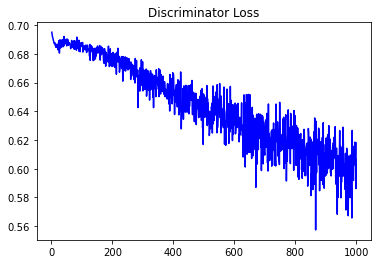

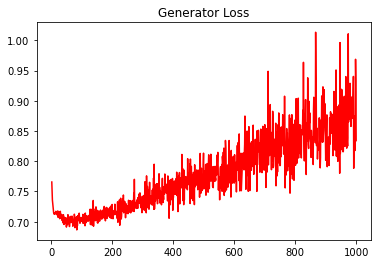

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.5288042409755289


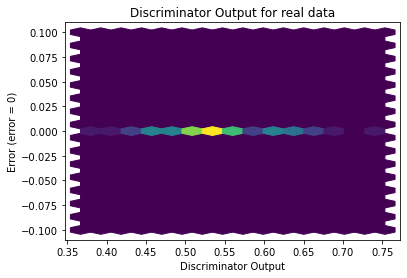

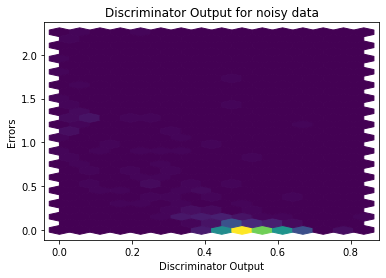

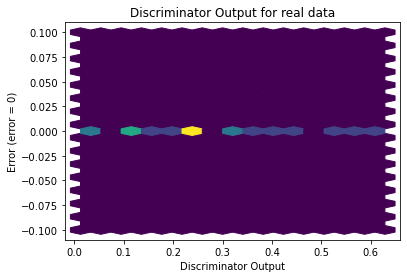

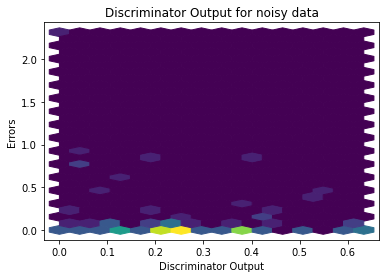

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
# #Generator
# gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
# constraints=network.weightConstraint()
# #Discriminator 
# disc3 = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


In [20]:
# ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [21]:
# ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
# sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

# print("MAE")
# print(mean(ABC_GAN3_metrics[1]))

In [22]:
# sanityChecks.discProbVsError(train_data,disc3,device)
# sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [23]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.001, betas=(0.5, 0.999))


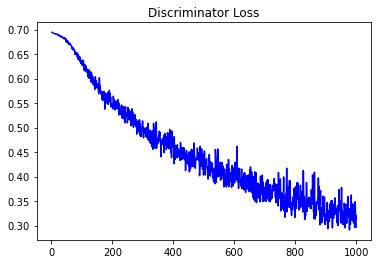

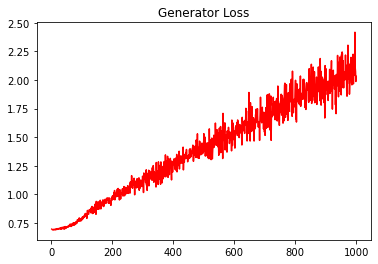

In [24]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [25]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

MAE
0.5735810442276197


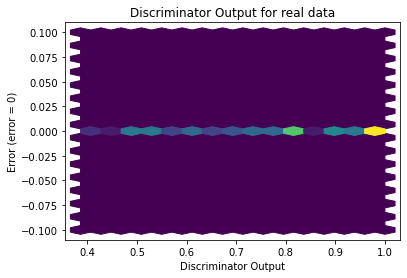

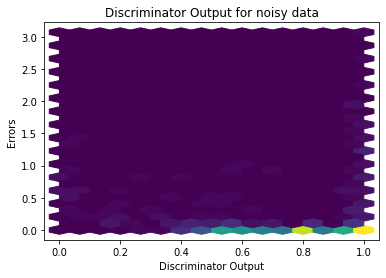

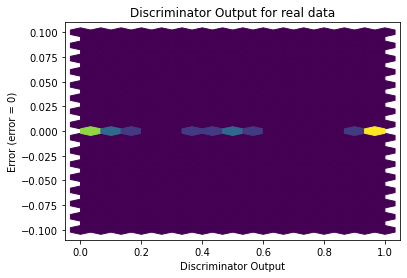

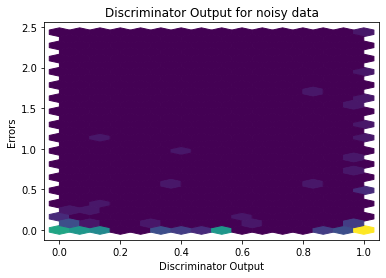

In [26]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [27]:
# print("Weight of the node at skip connection")
# for name,param in gen3.named_parameters():
#     if(name == "skipNode.weight"):
#         print(param)
#         sb.glue("Skip Connection Weight",param.item())

## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [28]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.]], requires_grad=True)
